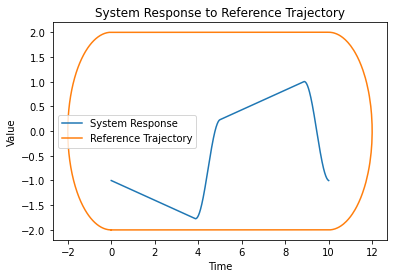

In [21]:
import csv
import numpy as np
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, kp, ki, kd, Ts):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.Ts = Ts
        self.integral_error = 0
        self.previous_error = 0
    
    def control(self, y, y_ref):
        error = y_ref - y
        self.integral_error += error * self.Ts
        derivative_error = (error - self.previous_error) / self.Ts
        u = self.kp * error + self.ki * self.integral_error + self.kd * derivative_error
        self.previous_error = error
        return u

# Define the reference trajectory from a CSV file
t_ref, y_ref = [], []
with open('data/input_trajectory.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        t_ref.append(float(row[0]))
        y_ref.append(float(row[1]))
t_ref = np.array(t_ref)
y_ref = np.array(y_ref)

# Define the system response trajectory
t = np.linspace(0, 10, len(t_ref))
y = np.zeros_like(y_ref)

# Define the PID controller and its gains
kp = 0.1
ki = 0.0
kd = 0.5
Ts = t[1] - t[0]
controller = PIDController(kp, ki, kd, Ts)

# Compute the system response trajectory using the PID controller
for i in range(len(t)):
    u = controller.control(y[i], y_ref[i])
    y[i] = y[i-1] + u * Ts

# Plot the system response trajectory
plt.plot(t, y, label='System Response')
plt.plot(t_ref, y_ref, label='Reference Trajectory')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('System Response to Reference Trajectory')
plt.legend()
plt.show()


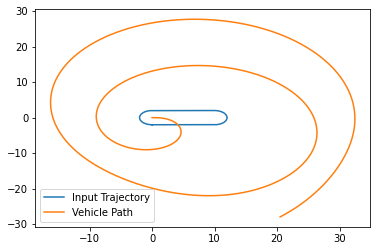

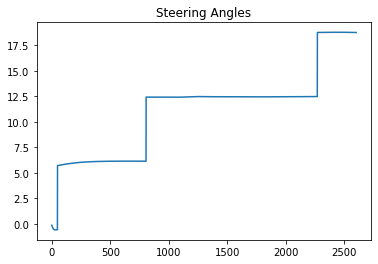

In [30]:
import numpy as np
import csv

# Define the filename and the delimiter used in the CSV file
filename = 'data/input_trajectory.csv'
delimiter = ','

# Load the CSV file into a numpy array
with open(filename, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=delimiter)
    trajectory = np.array(list(reader), dtype=np.float32)

# Print the loaded trajectory to check if it's correct
import numpy as np
import matplotlib.pyplot as plt

# Define the controller parameters
k = 1.0  # Controller sensitivity
dt = 0.1  # Time step
L = 2.5  # Wheelbase

# Define the initial state of the vehicle
x, y, theta = 0.0, 0.0, 0.01

# Define the arrays to store the vehicle's path and steering angles
path = [(x, y)]
steering_angles = []

# Define the main loop that applies the controller at each time step
for i in range(len(trajectory) - 1):
    # Compute the cross-track error (CTE) and heading error (HE)
    x, y = path[-1]
    x_d, y_d = trajectory[i + 1]
    cte = np.sqrt((y - y_d) ** 2 + (x - x_d) ** 2)
    he = np.arctan2(y_d - y, x_d - x) - theta
    
    # Compute the desired steering angle using the Stanley controller algorithm
    steer_angle = he + np.arctan(k * cte / (dt * L + 1e-6))
    steering_angles.append(steer_angle)
    
    # Update the vehicle's position and orientation based on the applied control
    x = x + np.cos(theta) * dt
    y = y + np.sin(theta) * dt
    theta = theta + np.tan(steer_angle) * dt / L
    
    # Store the updated path of the vehicle
    path.append((x, y))
    
# Plot the resulting trajectory and steering angles
plt.figure()
plt.plot(trajectory[:, 0], trajectory[:, 1], label='Input Trajectory')
plt.plot([p[0] for p in path], [p[1] for p in path], label='Vehicle Path')
plt.legend()

plt.figure()
plt.plot(steering_angles)
plt.title('Steering Angles')

plt.show()

